In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb 

In [57]:
df = pd.read_csv('./data/Incheon_populationv2.csv',encoding = 'euc-kr')

In [58]:
df

,year,man(korean),woman(korean),man(foreigner),woman(foreigner),oldman
0,2011,1410980,1390294,30523,19694,250528
1,2012,1431593,1412388,28099,19206,260107
2,2013,1448835,1430947,30027,20355,282471
3,2014,1459074,1443534,33030,22293,298818
4,2015,1469869,1455946,33770,23899,312905
5,2016,1477671,1465398,34394,24709,324255
6,2017,1479597,1468945,36353,26243,345024
7,2018,1481844,1472798,39200,28669,362675
8,2019,1482249,1474777,41155,31104,384506
9,2020,1473943,1468885,38152,29496,411483


In [62]:
 df['year'] = df['year'].astype(str)

In [60]:
print(df.index.to_list())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


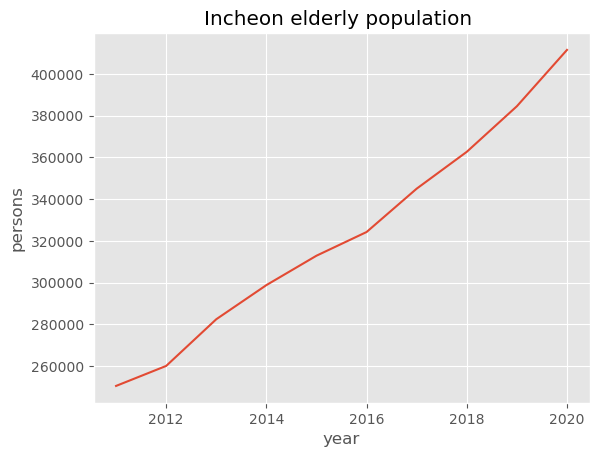

In [8]:
plt.style.use('ggplot')
plt.title('Incheon elderly population ')
plt.xlabel('year')
plt.ylabel('persons')
plt.plot(df['oldman'])
plt.show()

In [ ]:
print(df.iloc[0])

In [49]:
#제일 노인인구가 적었던 해 

In [50]:
df.loc[ df['oldman'] == df['oldman'].min() , ]

,man(korean),woman(korean),man(foreigner),woman(foreigner),oldman,sum
year,,,,,,
2011,1410980,1390294,30523,19694,250528,3102019


In [51]:
#제일 노인인구가 많았던 해 

In [46]:
df.loc[ df['oldman'] == df['oldman'].max() , ]

,man(korean),woman(korean),man(foreigner),woman(foreigner),oldman,sum
year,,,,,,
2020,1473943,1468885,38152,29496,411483,3421959


In [11]:
print(df.loc[2020,'man(korean)'])

1473943


In [12]:
print(df.loc[[2019,2020],['man(korean)','woman(korean)']])

      man(korean)  woman(korean)
year                            
2019      1482249        1474777
2020      1473943        1468885


In [13]:
df2= df.loc[2020]

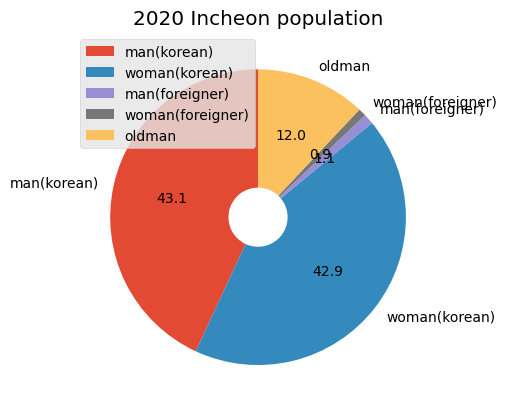

In [14]:
plt.pie(df2, labels = df2.index, autopct='%.1f',startangle=90,wedgeprops={'width':0.8})
plt.legend()
plt.title('2020 Incheon population')
plt.show()

In [15]:
df.describe()

,man(korean),woman(korean),man(foreigner),woman(foreigner),oldman
count,1.000000e+01,1.000000e+01,10.000000,10.000000,10.000000
mean,1.461566e+06,1.448391e+06,34470.300000,24566.800000,323277.200000
std,2.420104e+04,2.882913e+04,4251.052315,4249.544389,52924.680627
min,1.410980e+06,1.390294e+06,28099.000000,19206.000000,250528.000000
25%,1.451395e+06,1.434094e+06,31149.750000,20839.500000,286557.750000
50%,1.471906e+06,1.460672e+06,34082.000000,24304.000000,318580.000000
75%,1.479116e+06,1.468930e+06,37702.250000,28062.500000,358262.250000
max,1.482249e+06,1.474777e+06,41155.000000,31104.000000,411483.000000


In [16]:
# 총 인구 수 와 노인의 상관 관계 

In [17]:
df2=df.sum(axis=1)

In [18]:
df2

year
2011    3102019
2012    3151393
2013    3212635
2014    3256749
2015    3296389
2016    3326427
2017    3356162
2018    3385186
2019    3413791
2020    3421959
dtype: int64

In [19]:
df['sum'] = df2

In [20]:
df

,man(korean),woman(korean),man(foreigner),woman(foreigner),oldman,sum
year,,,,,,
2011,1410980,1390294,30523,19694,250528,3102019
2012,1431593,1412388,28099,19206,260107,3151393
2013,1448835,1430947,30027,20355,282471,3212635
2014,1459074,1443534,33030,22293,298818,3256749
2015,1469869,1455946,33770,23899,312905,3296389
2016,1477671,1465398,34394,24709,324255,3326427
2017,1479597,1468945,36353,26243,345024,3356162
2018,1481844,1472798,39200,28669,362675,3385186
2019,1482249,1474777,41155,31104,384506,3413791


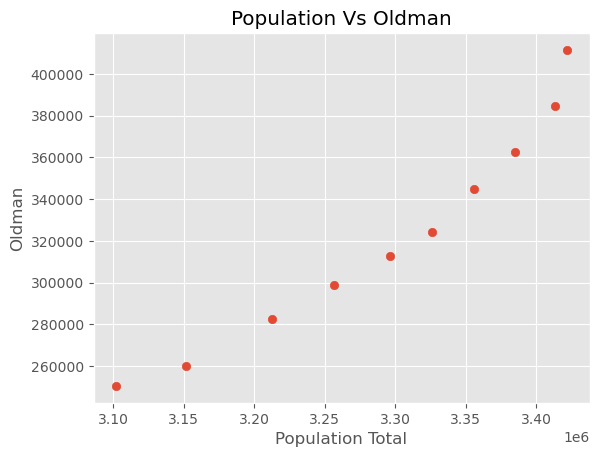

In [21]:
plt.scatter(data = df, x= 'sum', y= 'oldman')
plt.title('Population Vs Oldman')
plt.xlabel('Population Total')
plt.ylabel('Oldman')
plt.show()

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X = df.loc[ : , 'man(korean)' : 'woman(foreigner)'  ]  

In [24]:
y = df['oldman']

In [25]:
y

year
2011    250528
2012    260107
2013    282471
2014    298818
2015    312905
2016    324255
2017    345024
2018    362675
2019    384506
2020    411483
Name: oldman, dtype: int64

In [26]:
# Scikit-Learn 의 LinearRegression 은, 자동으로 피쳐 스케일링을 해준다.

In [27]:
# Train / Test 로 나누기

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2,  random_state= 42)

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
regressor = LinearRegression() #선형회계 

In [31]:
#학습

In [32]:
regressor.fit(X_train,y_train)

LinearRegression()

In [33]:
X_train

,man(korean),woman(korean),man(foreigner),woman(foreigner)
year,,,,
2016,1477671,1465398,34394,24709
2011,1410980,1390294,30523,19694
2018,1481844,1472798,39200,28669
2013,1448835,1430947,30027,20355
2020,1473943,1468885,38152,29496
2015,1469869,1455946,33770,23899
2014,1459074,1443534,33030,22293
2017,1479597,1468945,36353,26243


In [34]:
y_pred = regressor.predict(X_test) #테스트 값을 넣고 예측.

In [35]:
y_pred

array([375800.23675612, 269436.39108405])

In [36]:
y_test

year
2019    384506
2012    260107
Name: oldman, dtype: int64

In [37]:
((y_test - y_pred) ** 2 ).mean()

81413925.8288286

In [38]:
new_data = np.array( [1477671,1465398,34394,24709] )

In [39]:
new_data

array([1477671, 1465398,   34394,   24709])

In [40]:
new_data = new_data.reshape(1,4)

In [41]:
new_data.ndim

2

In [42]:
regressor.predict(new_data) ## 예측

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([330123.12742284])

In [43]:
import joblib

In [44]:
joblib.dump(regressor,'regressor.pkl')

['regressor.pkl']